In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

In [4]:
df=pd.read_csv('green_tech_data.csv')
df

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
...,...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0


In [9]:
X=df[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
y=df[['sustainability']]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [15]:
model1=LogisticRegression()
model1.fit(X_train,y_train)

C:\Users\Internet Centre\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
y_pred=model1.predict(X_test)

In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [19]:
accuracy=accuracy_score(y_test,y_pred)
print( "Accuracy of the model",accuracy)

Accuracy of the model 0.95


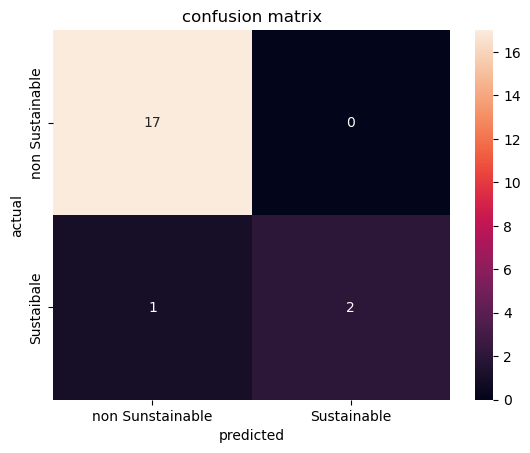

In [30]:
import seaborn as sns
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',color='blue',xticklabels=['non Sunstainable','Sustainable'],yticklabels=['non Sustainable','Sustaibale'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()
           


In [39]:
print(classification_report(y_test,y_pred,target_names=['non sustainable','sustainable']))

                 precision    recall  f1-score   support

non sustainable       0.94      1.00      0.97        17
    sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [42]:
joblib.dump(model1,'logregmodel_sustainable.pkl')

['logregmodel_sustainable.pkl']